In [4]:
import pandas as pd
df = pd.read_csv('geyser.csv')
df.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [5]:
df["kind"].value_counts()

kind
long     172
short    100
Name: count, dtype: int64

In [6]:
df.isna().any()

duration    False
waiting     False
kind        False
dtype: bool

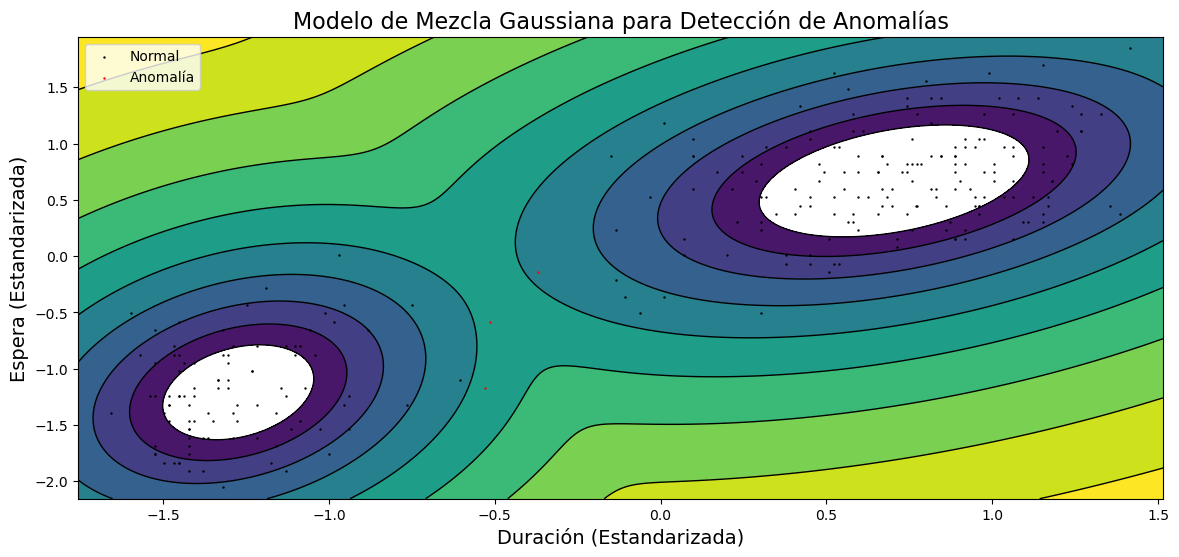

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LogNorm
# Realizar codificación de etiquetas en la variable 'kind'
label_encoder = LabelEncoder()
df['kind_encoded'] = label_encoder.fit_transform(df['kind'])

# Seleccionar características para la detección de anomalías
features = ['duration', 'waiting']

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Ajustar un Modelo de Mezcla Gaussiana para la detección de anomalías
n_components = 2  # Puedes ajustar el número de componentes según tu conjunto de datos
gm = GaussianMixture(n_components=n_components)
gm.fit(X)

# Predecir si cada instancia es un valor atípico (anómalo) o no
df['anomaly'] = gm.score_samples(X)

# Crear una visualización similar al ejemplo proporcionado
def plot_gaussian_mixture(clusterer, X, y):
    plt.figure(figsize=(14, 6))
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                         np.linspace(mins[1], maxs[1], 1000))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='k', marker='.', s=2, label='Normal')
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='r', marker='.', s=2, label='Anomalía')
    
    plt.xlabel("Duración (Estandarizada)", fontsize=14)
    plt.ylabel("Espera (Estandarizada)", fontsize=14)
    plt.title("Modelo de Mezcla Gaussiana para Detección de Anomalías", fontsize=16)
    plt.legend()
    plt.show()

# Las anomalías se identifican como instancias con puntajes de probabilidad más bajos
umbral = np.percentile(df['anomaly'], 1)  
df['anomaly_label'] = df['anomaly'] < umbral

# Visualizar los resultados del Modelo de Mezcla Gaussiana
plot_gaussian_mixture(gm, X, df['anomaly_label'])